<center><br><font size=6>Course Project</font><br>
<b>Introduction to Machine Learning</b>
<br>Industrial Engineering and Management - Tel Aviv University
<br><br>
Authors:
<br>
Soldatenko Olga - 342480308
<br>
Goldberg Elizaveta - 337762462
<br><br>
Group 3
<br><font size=2>July 2020</font></center>

**<font size=4>Table of Contents</font>**
* [Part 1 - Exploration.](#exploration)
* [Part 2 - Preprocessing.](#preprocessing)
* [Part 3 - Models.](#models)
* [Part 4 - Evaluation.](#evaluation)
* [Part 5 - Prediction on test set.](#prediction)


**Import Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import timeit
start = timeit.default_timer()

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10, 'figure.figsize': (8, 6)}) # set font and plot size to be larger
import seaborn as sns

In [5]:
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [6]:
from scipy import stats

In [7]:
def import_data():
    df = pd.read_csv("./train.csv") 
    df_test = pd.read_csv("./test_without_target.csv", index_col=0) 
    return df, df_test

In [8]:
df,df_test = import_data() 


<a id='exploration'></a>

# Part 1 - Exploration

__A look at our data__

In [9]:
df.shape

(22161, 26)

In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,label
0,1.170981,5.672133,0.6,80.0,76.0,D,a21,1.107143,0.692857,5,...,13.9,12.2,D,D,28.0,7.0,2011,40.0,15.420787,1
1,2.595788,23.203289,6.4,43.0,64.0,N,a9,1.700000,0.614286,11,...,18.6,16.5,N,I,61.0,43.0,2012,110.0,240.496883,0
2,0.972794,7.127348,0.4,63.0,100.0,C,a4,1.242857,0.428571,6,...,16.5,9.6,M,NaN,15.0,7.0,2012,0.0,224.282903,0
3,1.891667,17.881507,4.2,65.0,71.0,K,a15,1.050000,0.671429,10,...,14.2,11.4,K,D,39.0,24.0,2010,130.0,86.810830,0
4,1.965881,13.936969,3.2,40.0,62.0,F,a1,1.950000,1.085714,3,...,26.6,23.4,C,NaN,30.0,20.0,2011,0.0,120.642922,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22161 entries, 0 to 22160
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       22161 non-null  float64
 1   1       22161 non-null  float64
 2   2       22161 non-null  float64
 3   3       22102 non-null  float64
 4   4       22057 non-null  float64
 5   5       20812 non-null  object 
 6   6       22161 non-null  object 
 7   7       22154 non-null  float64
 8   8       22143 non-null  float64
 9   9       22161 non-null  int64  
 10  10      22161 non-null  float64
 11  11      22055 non-null  float64
 12  12      22048 non-null  float64
 13  13      22161 non-null  object 
 14  14      22161 non-null  object 
 15  15      20290 non-null  float64
 16  16      22133 non-null  float64
 17  17      22109 non-null  float64
 18  18      21951 non-null  object 
 19  19      21141 non-null  object 
 20  20      20816 non-null  float64
 21  21      22062 non-null  float64
 22

__Heat map__

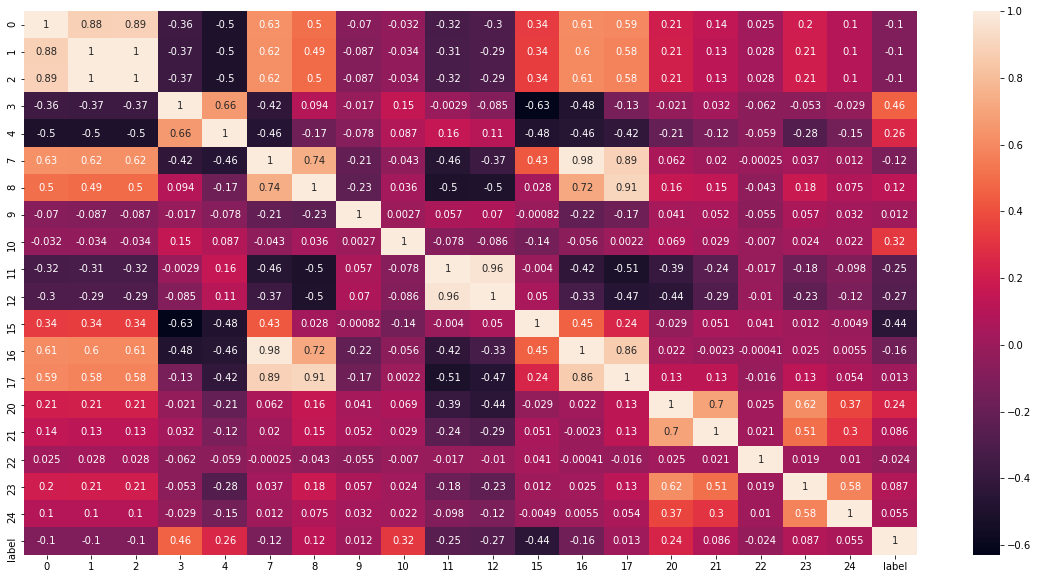

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), 
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns, annot = True,fmt='.2g')
plt.show()

Features with a high correlation, we could use only one of each group in our model:
 - 7,16,17
 - 8,17
 - 0,1,2
 - 11,12

To confirm high corelation we'll gone build scatters for this features

In [13]:
def cor_scatter(X,Y):
    ax1 = df.plot.scatter(x=X,
                          y=Y)
    ax1.set_title(X +' vs '+ Y)

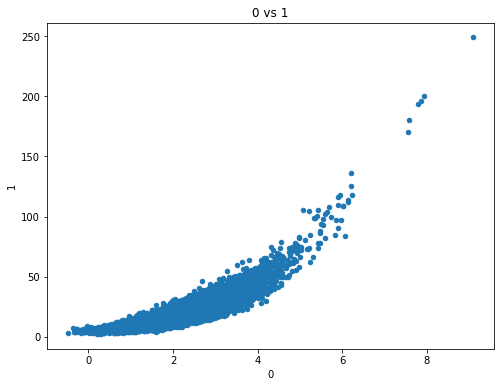

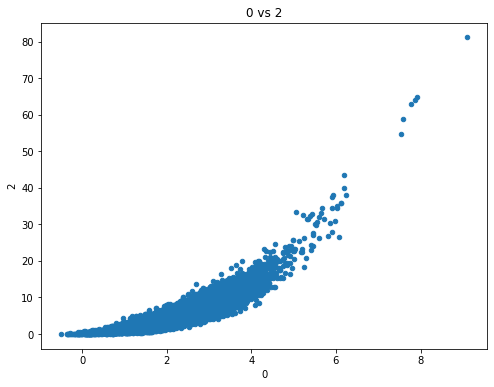

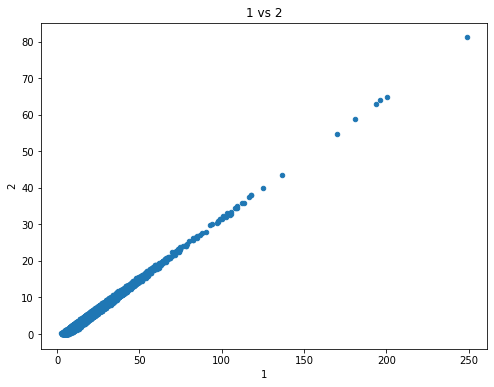

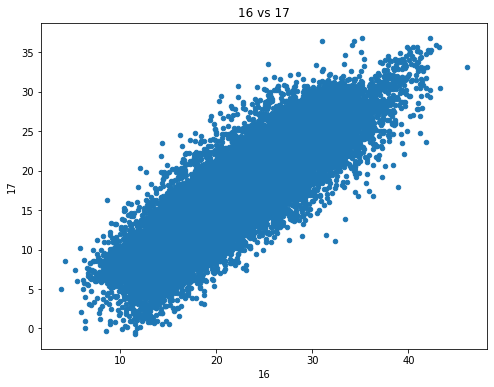

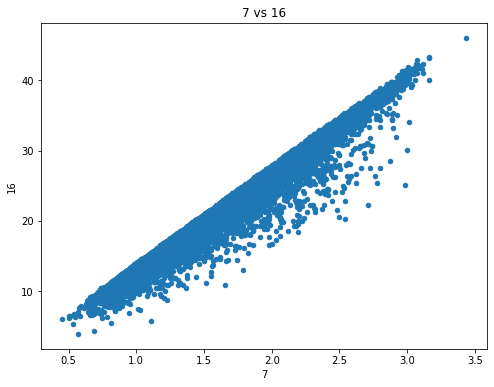

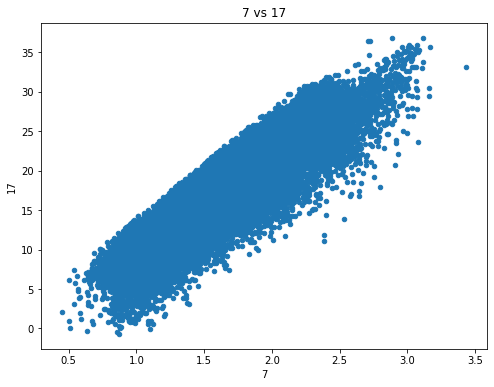

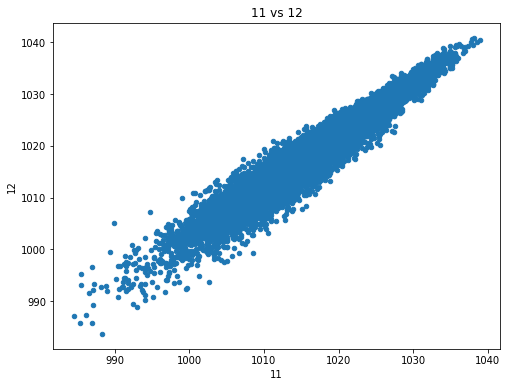

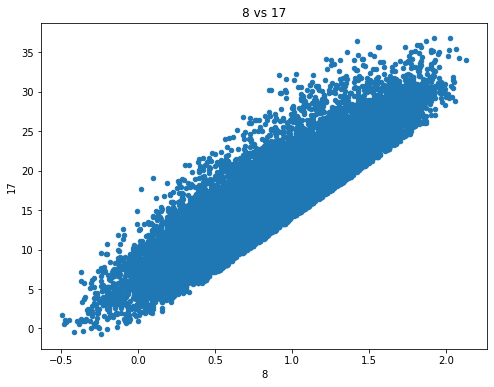

In [14]:
comb_list=[('0','1'),('0','2'),('1','2'),('16','17'),('7','16'),('7','17'),('11','12'),('8','17')]
for comb in comb_list:
    cor_scatter(comb[0],comb[1])

__Check for duplicated cells__

In [15]:
df[df.duplicated()]

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,label


## Histograms and boxplots

For categorical features we built histogram and pie plot
<br/>
For numerical features - histogram and box plot

In [16]:
def draw_graphs(df,feature):
    
    #for feature float or int, draw histogram and boxplot
    if df.dtypes[feature] == 'float64' or df.dtypes[feature] == 'int64':
        draw_float(df,feature)
    #for categorical  feature, draw barplot
    else:
        draw_object(df,feature)
        draw_object_pie(df,feature)

In [17]:
def draw_float(df,feature):
    fig, axs  = plt.subplots(2,2,figsize=(15,10),sharex= True)
    fig.suptitle('Feature '+ str(feature), fontsize=16)
    for ax in axs:
        for a in ax:
            a.grid(zorder = 0)
    axs[0, 0].hist(df[df['label'] == 0].iloc[:,feature],zorder=3)
    axs[0, 0].set_title('feature '+ str(feature)+', label 0 ')
    axs[1, 0]. hist(df[df['label'] == 1].iloc[:,feature],zorder=3)
    axs[1, 0].set_title('feature '+ str(feature)+', label 1')
    axs[0, 1].boxplot(df[df['label'] == 0].iloc[:,feature],vert=False,zorder=3)
    axs[0, 1].set_title('feature '+ str(feature)+', label 0')
    axs[1, 1].boxplot(df[df['label'] == 1].iloc[:,feature],vert=False,zorder=3)
    axs[1, 1].set_title('feature '+ str(feature)+', label 1')



In [18]:
def draw_object(df,feature):
    fig, axs  = plt.subplots(2,1,figsize=(15,10))
    fig.suptitle('Feature '+ str(feature), fontsize=16)
    for ax in axs:
        ax.grid(zorder = 0)
    axs[0].bar(df[df['label']==0 ].iloc[:,feature].value_counts().index.values, df[df['label']==0 ].iloc[:,feature].value_counts().values,zorder=3)
    axs[0].set_title('feature '+ str(feature)+', label 0')
    axs[1].bar(df[df['label']==1 ].iloc[:,feature].value_counts().index.values, df[df['label']==1 ].iloc[:,feature].value_counts().values,zorder=3)
    axs[1].set_title('feature '+ str(feature)+', label 1')

In [19]:
def draw_object_pie(df,feature):
    fig, axs  = plt.subplots(1,2,figsize=(15,10))
    fig.suptitle('Feature '+ str(feature), fontsize=16)
    for ax in axs:
        ax.grid(zorder = 0)
    labels0 = df[df['label']==0 ].iloc[:,feature].value_counts().index.values
    sizes0 = df[df['label']==0 ].iloc[:,feature].value_counts().values
    labels1 = df[df['label']==1 ].iloc[:,feature].value_counts().index.values
    sizes1 = df[df['label']==1 ].iloc[:,feature].value_counts().values
    axs[0].pie(sizes0, explode=(sizes0 == max(sizes0)) * 0.1,labels=labels0,autopct='%1.1f%%', shadow=True, startangle=140)
    axs[0].set_title('feature '+ str(feature)+', label 0')
    axs[1].pie(sizes1,explode=(sizes1 == max(sizes1)) * 0.1, labels=labels1,autopct='%1.1f%%', shadow=True, startangle=140)
    axs[1].set_title('feature '+ str(feature)+', label 1')

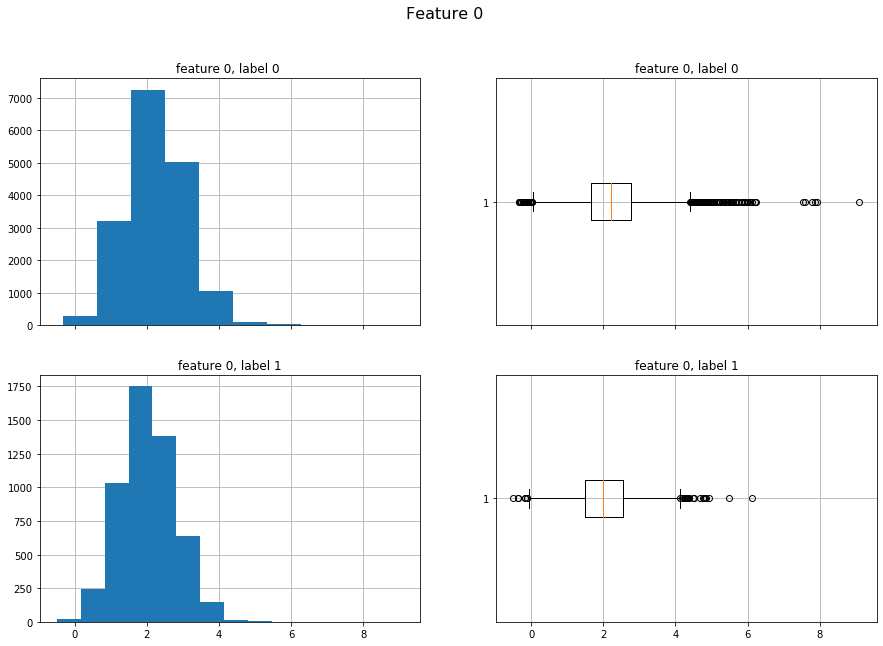

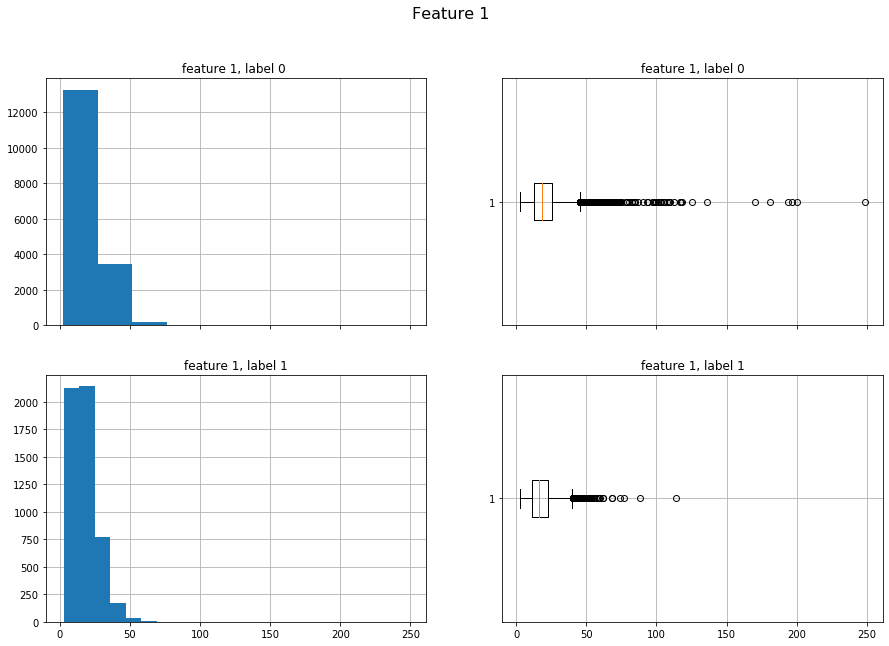

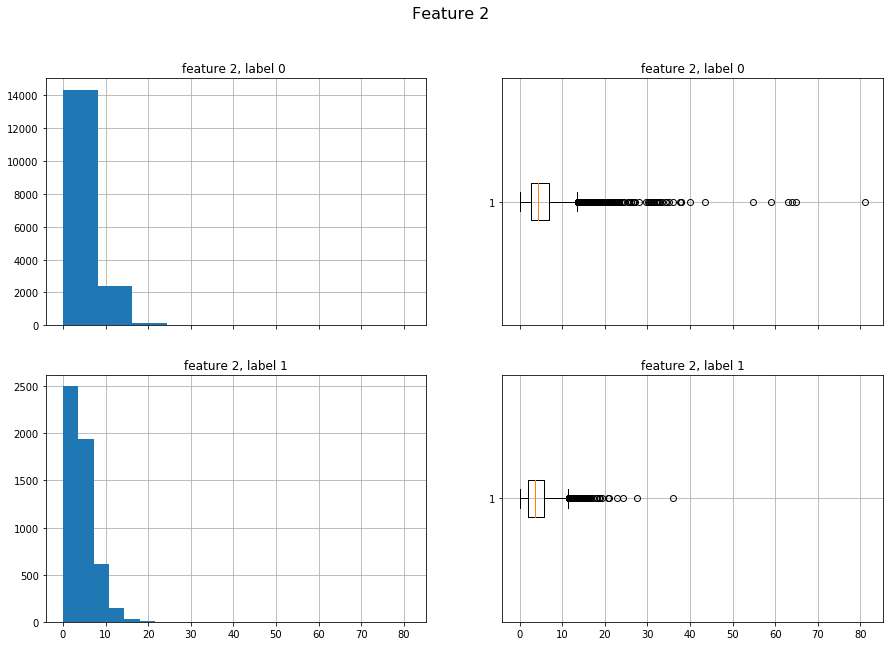

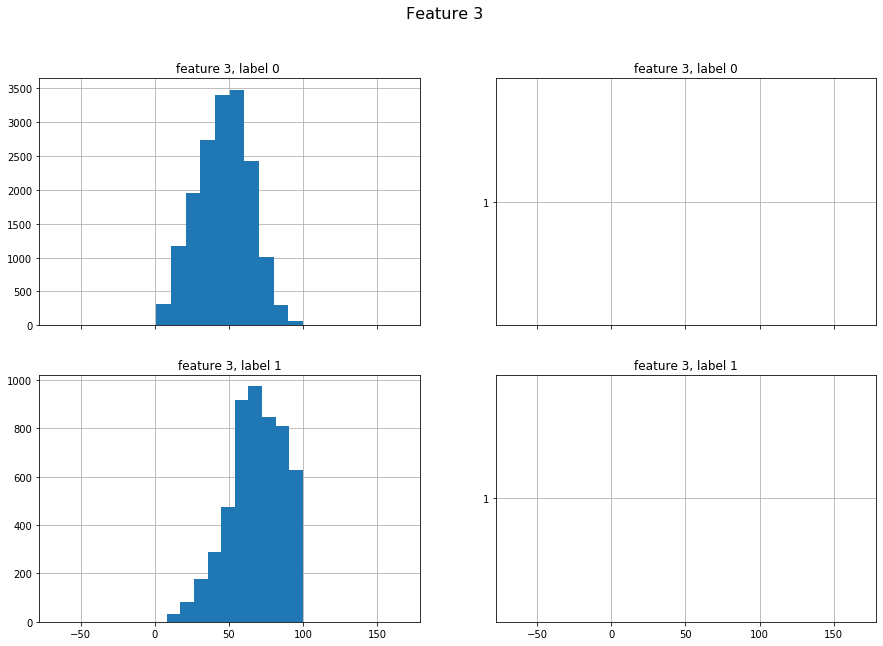

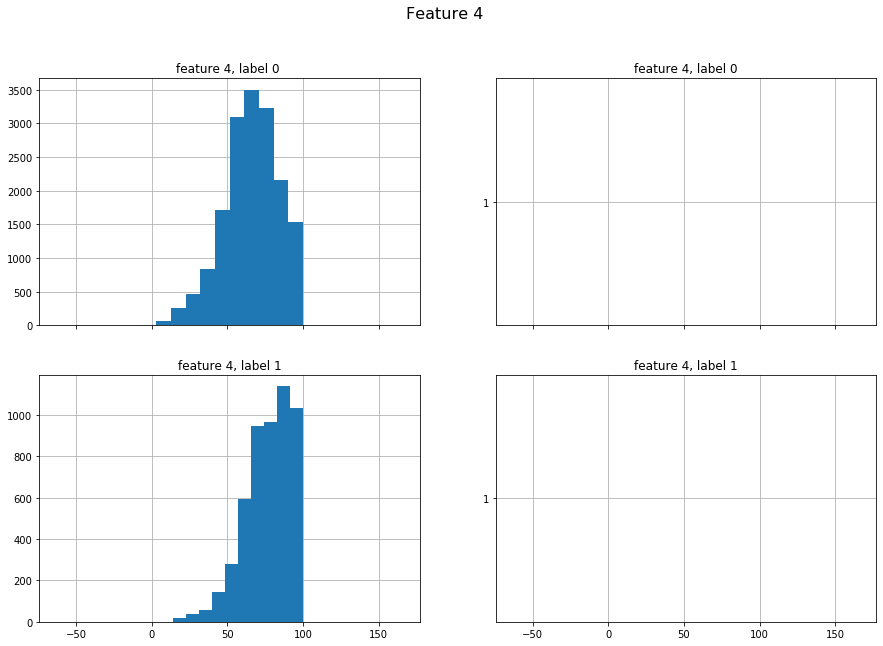

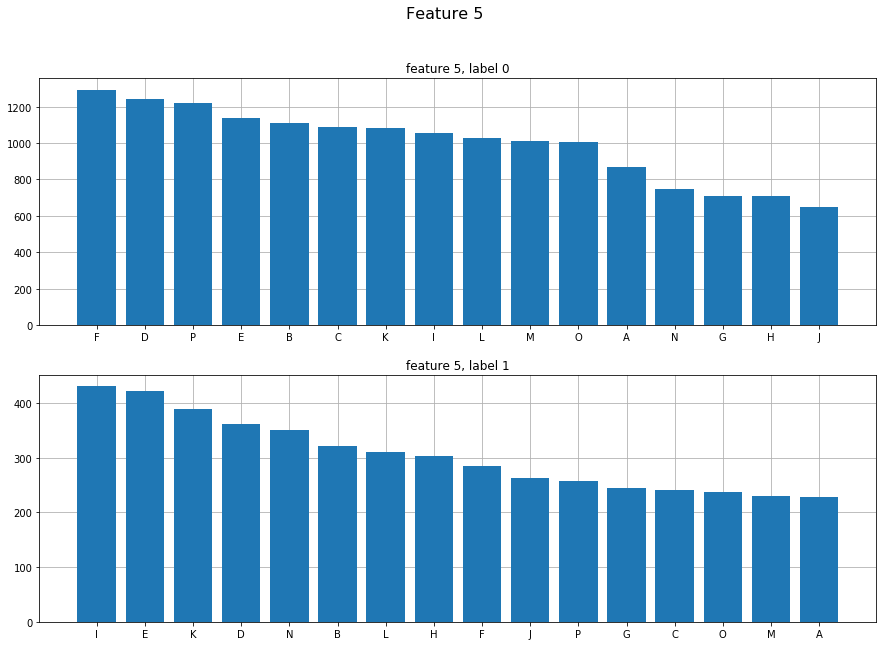

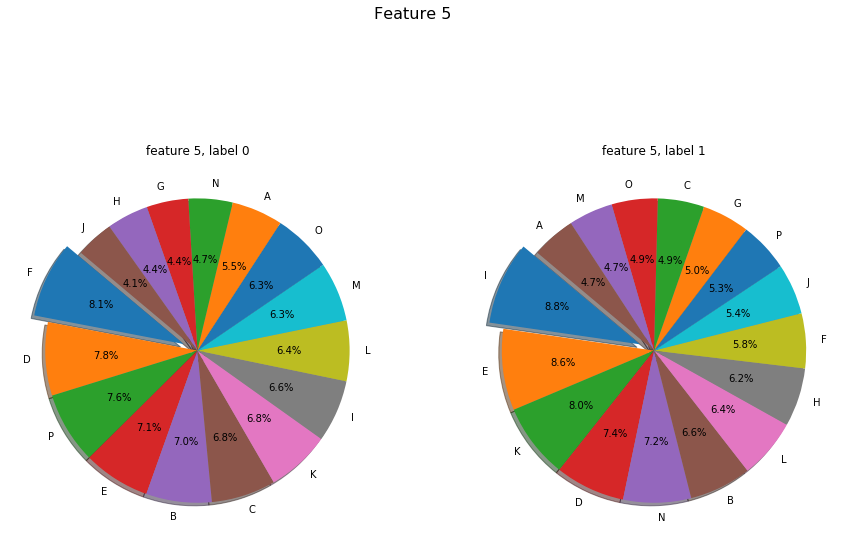

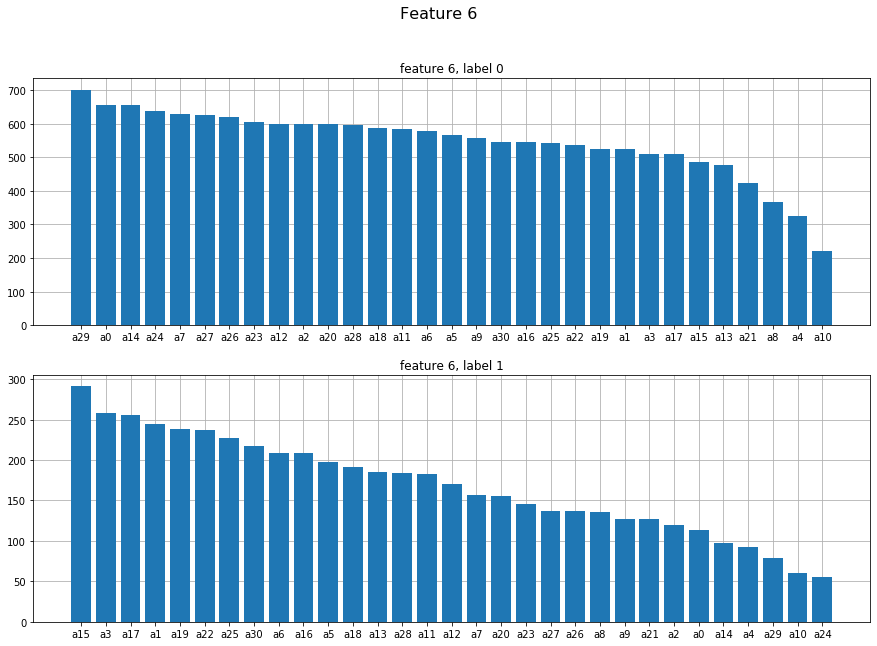

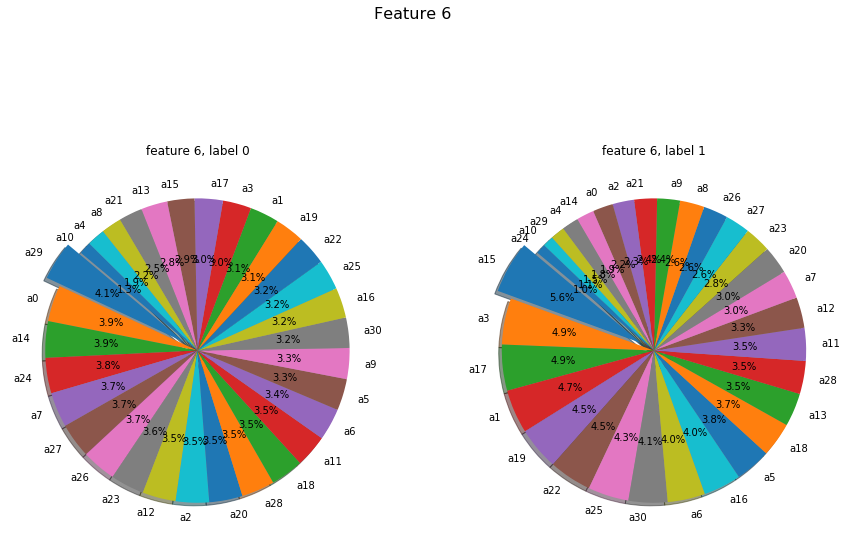

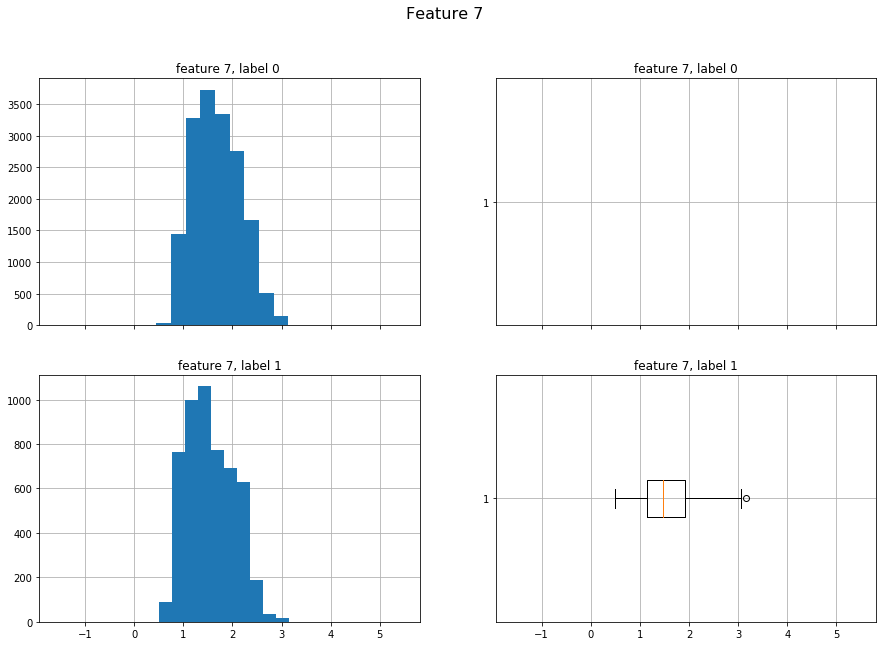

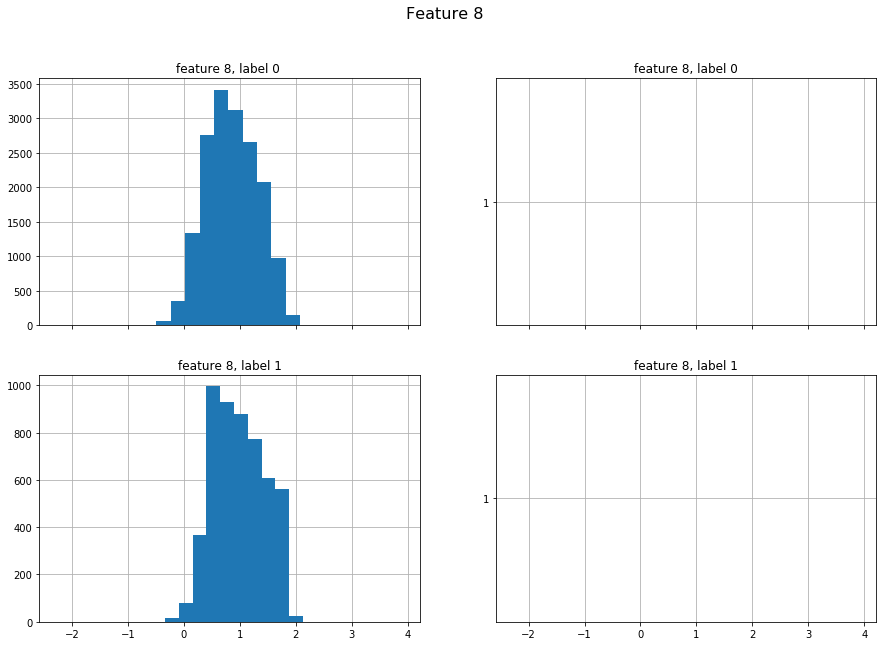

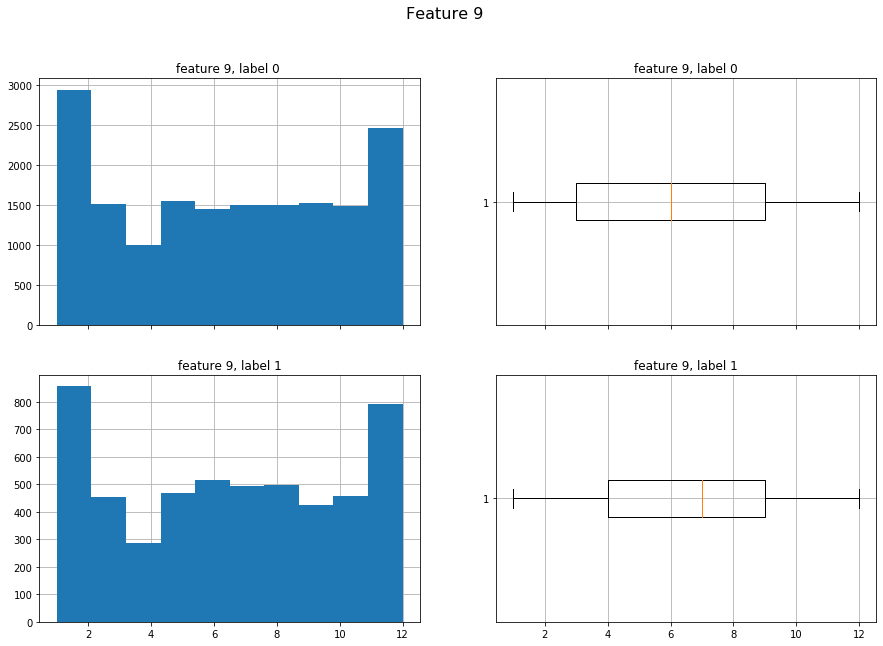

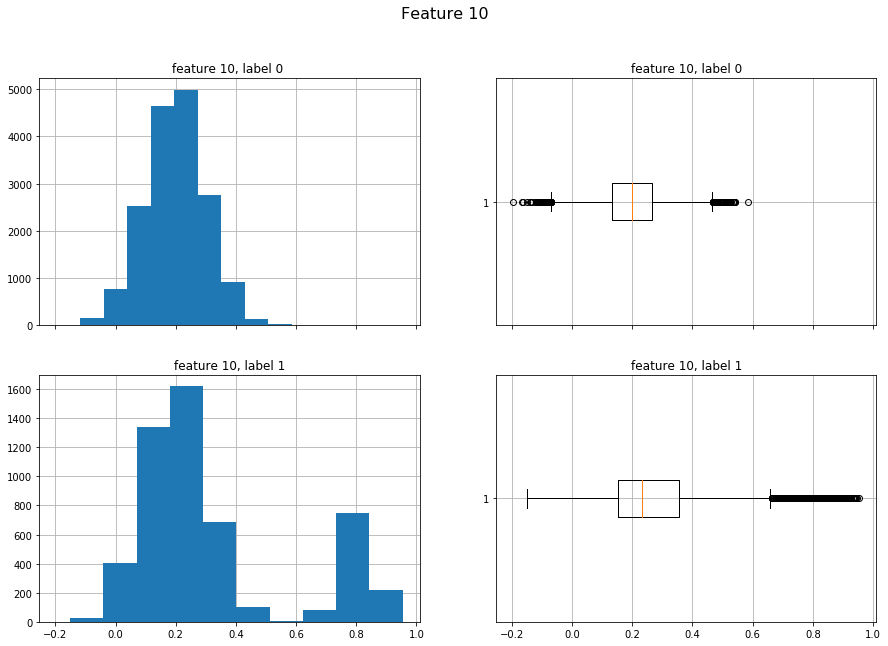

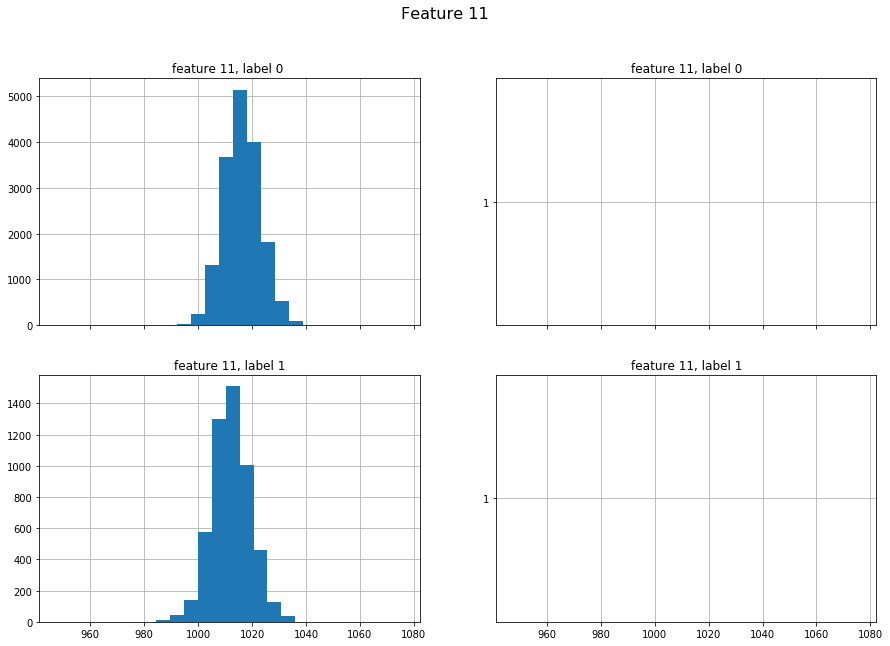

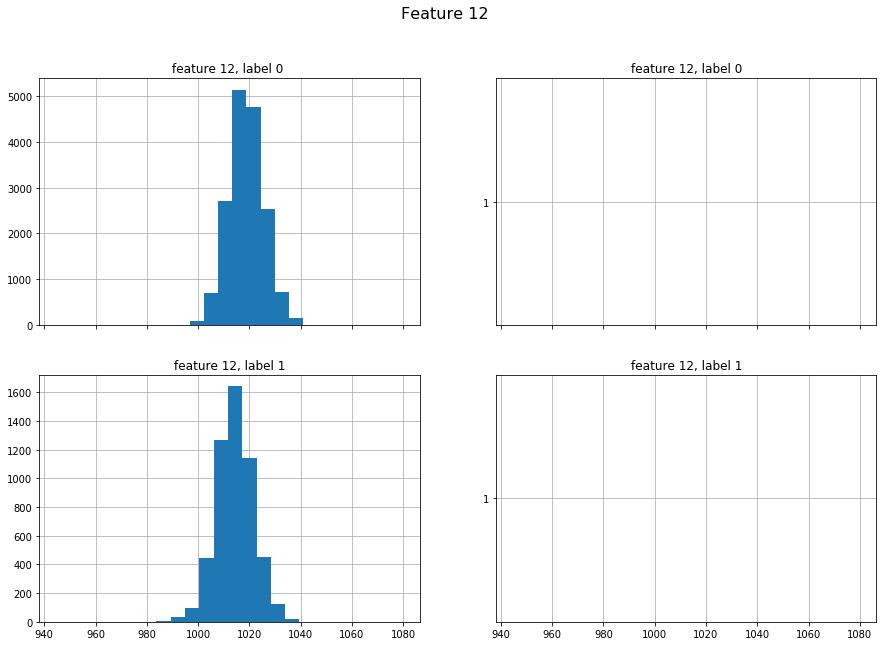

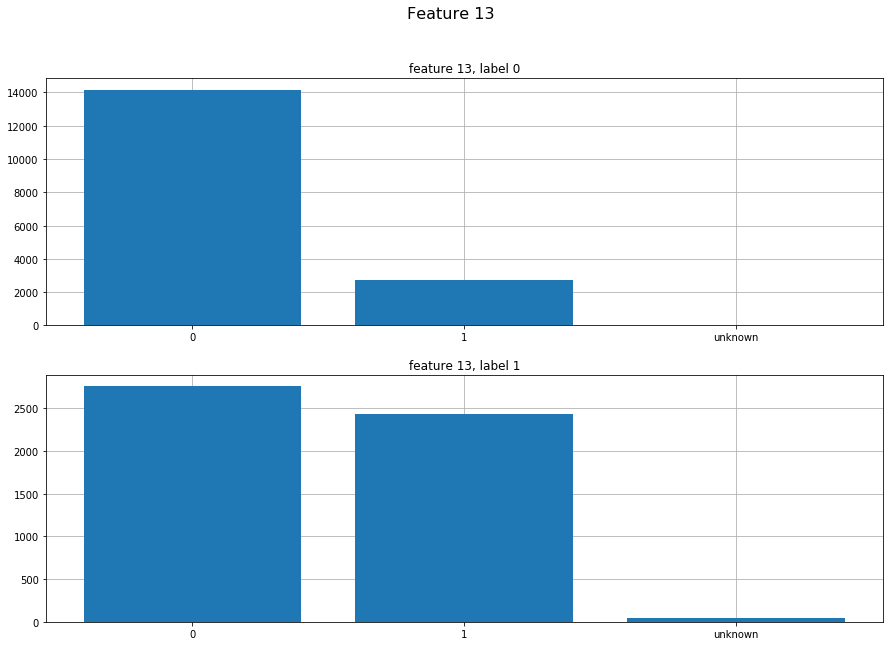

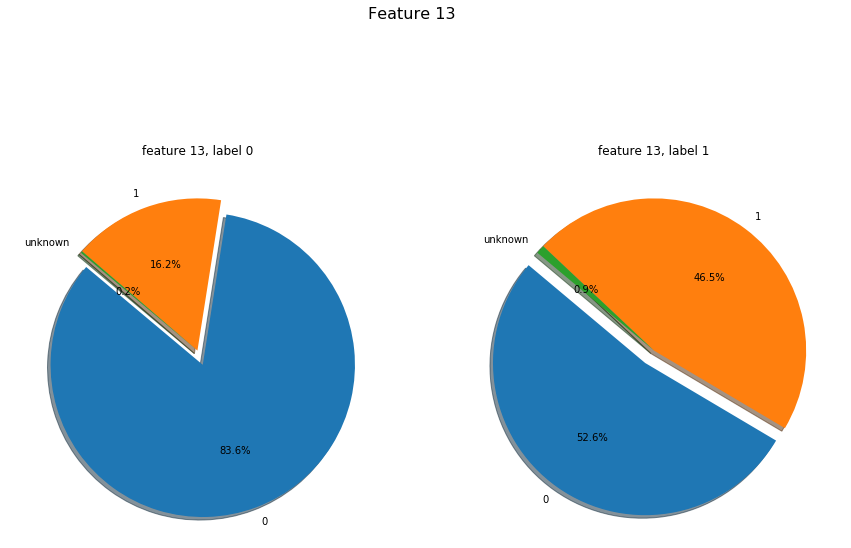

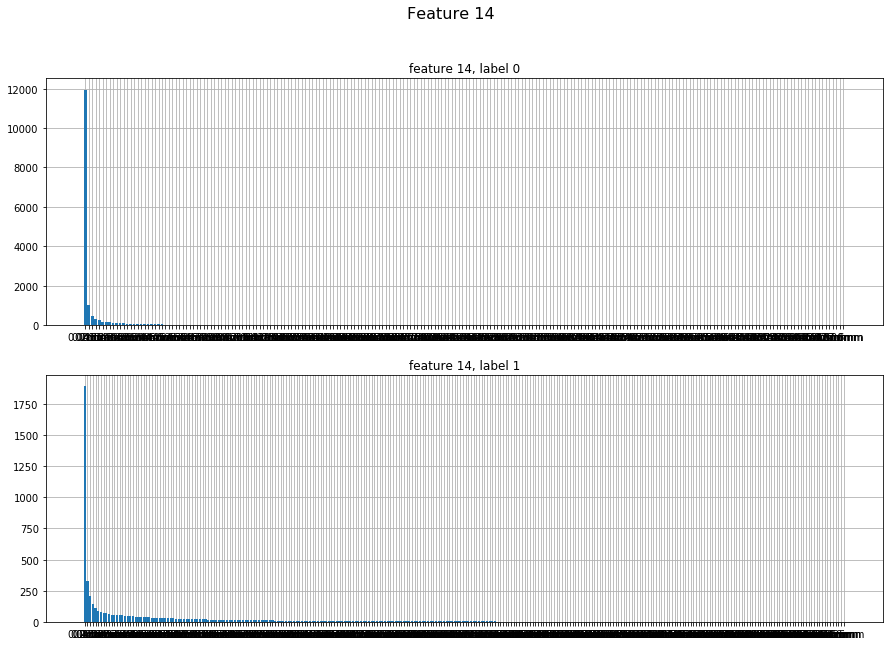

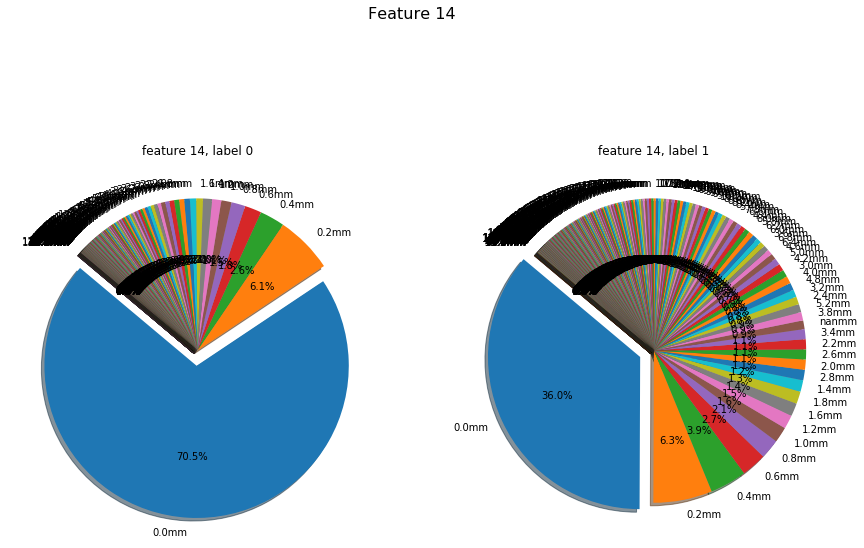

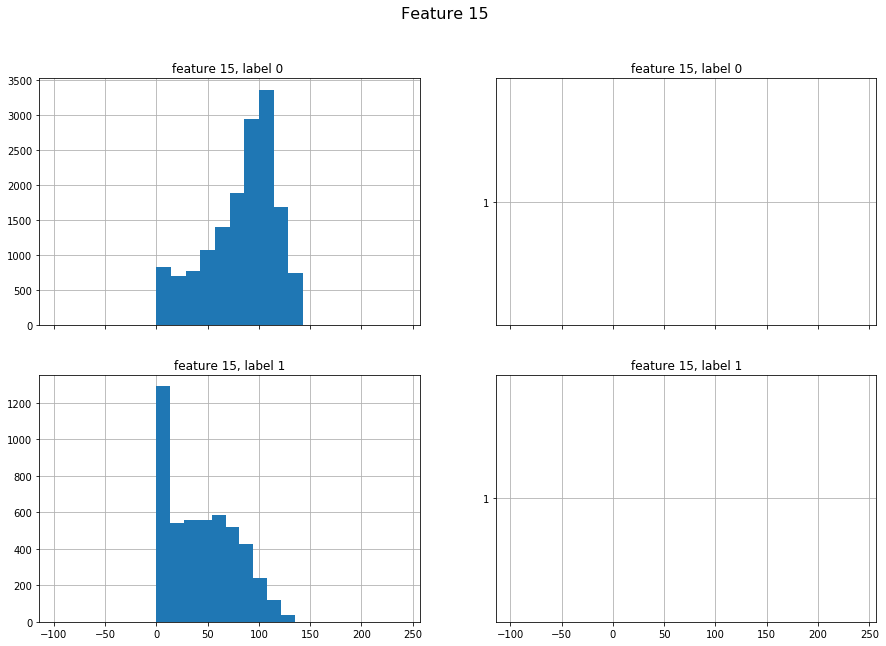

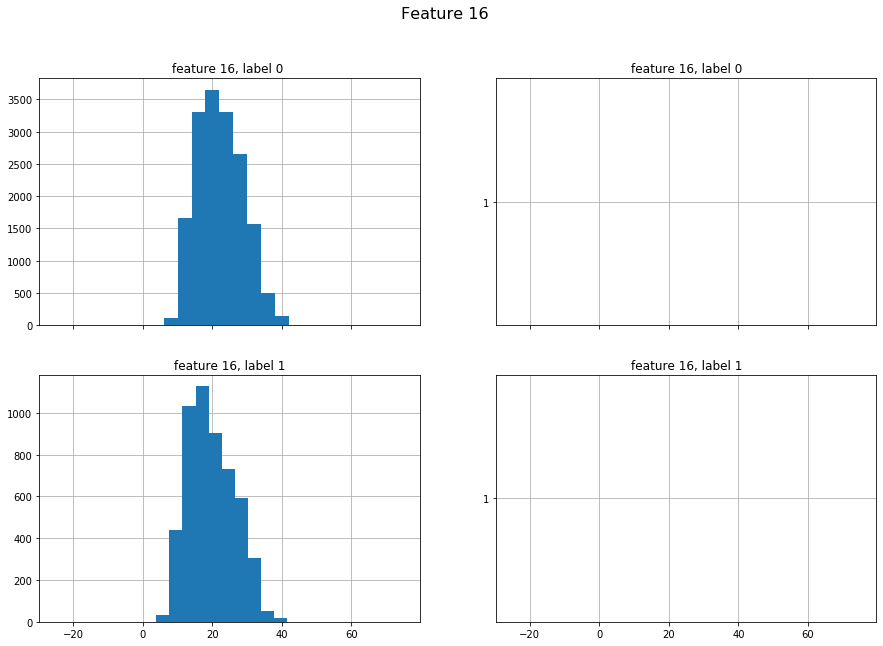

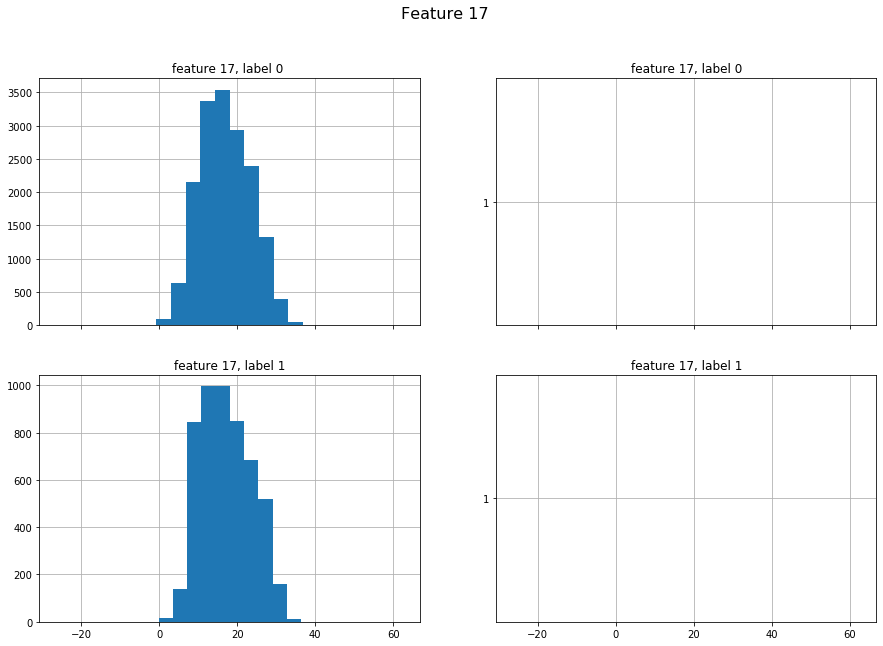

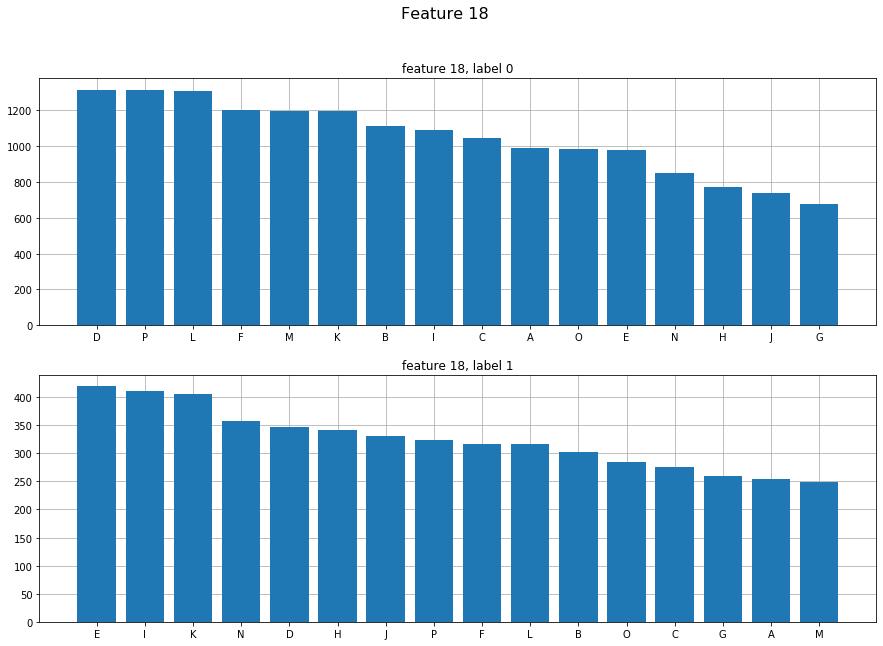

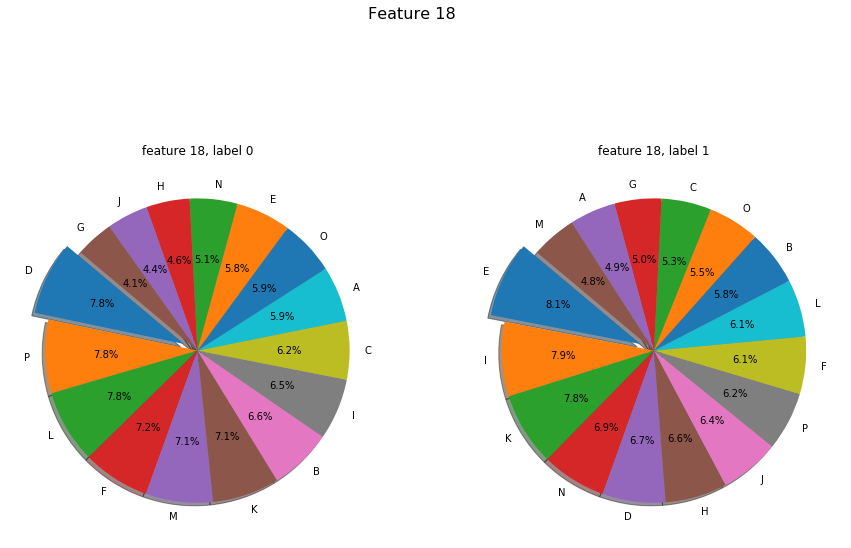

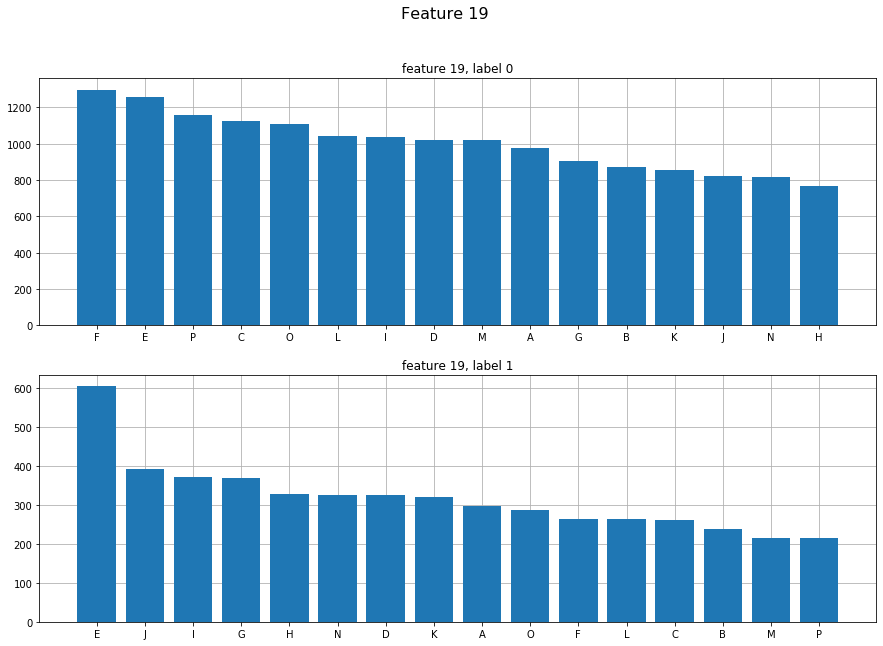

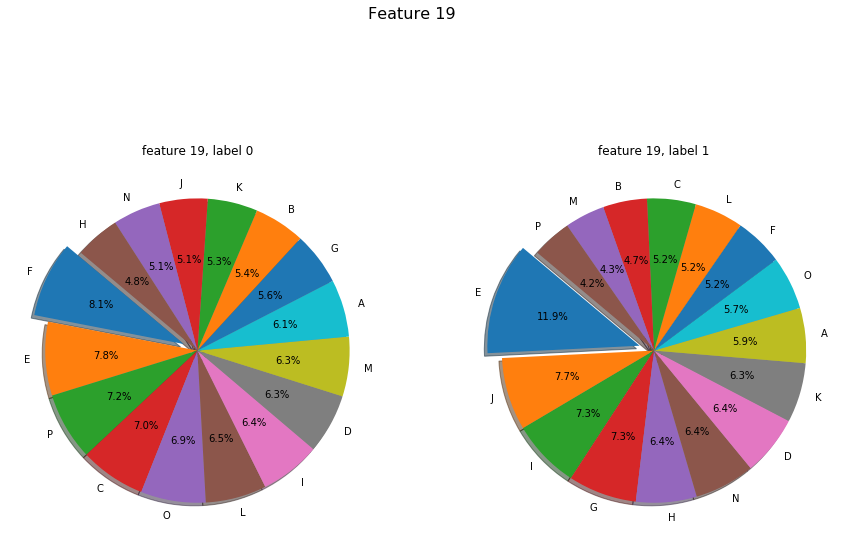

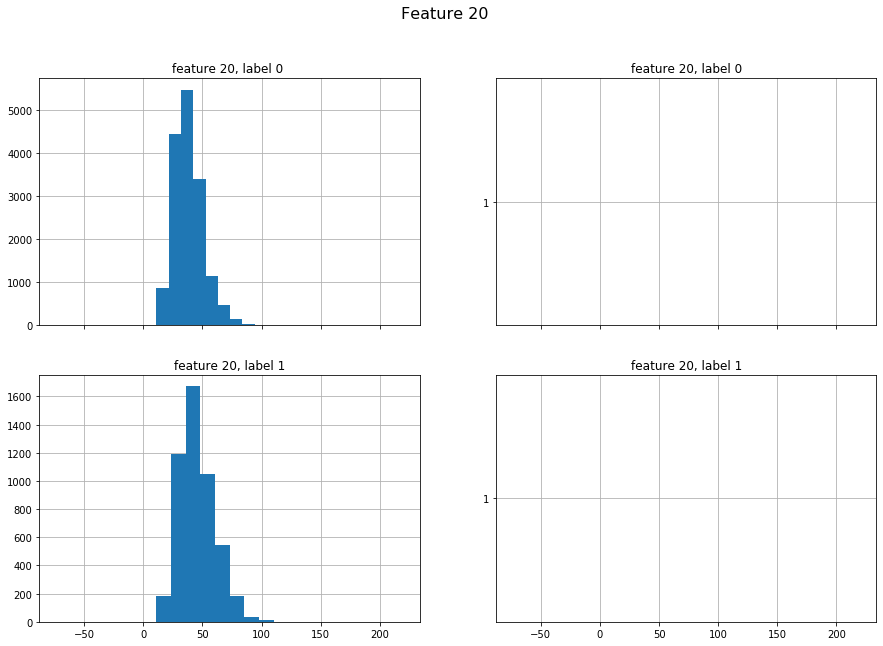

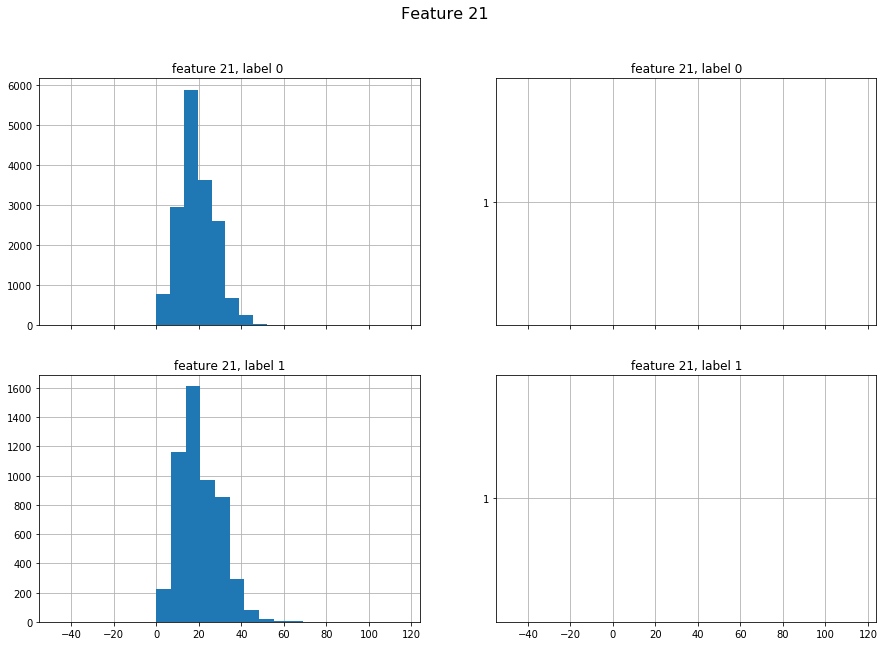

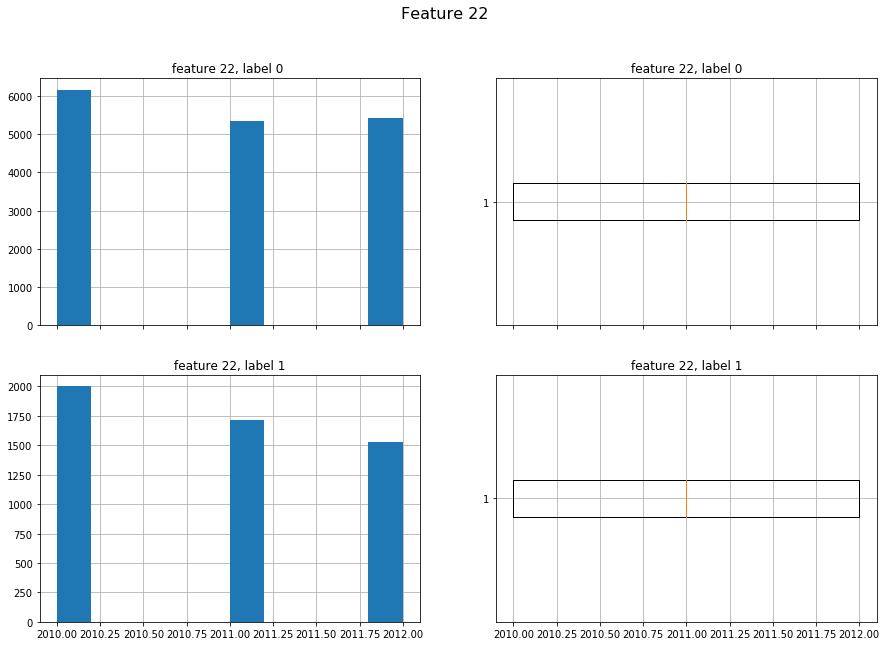

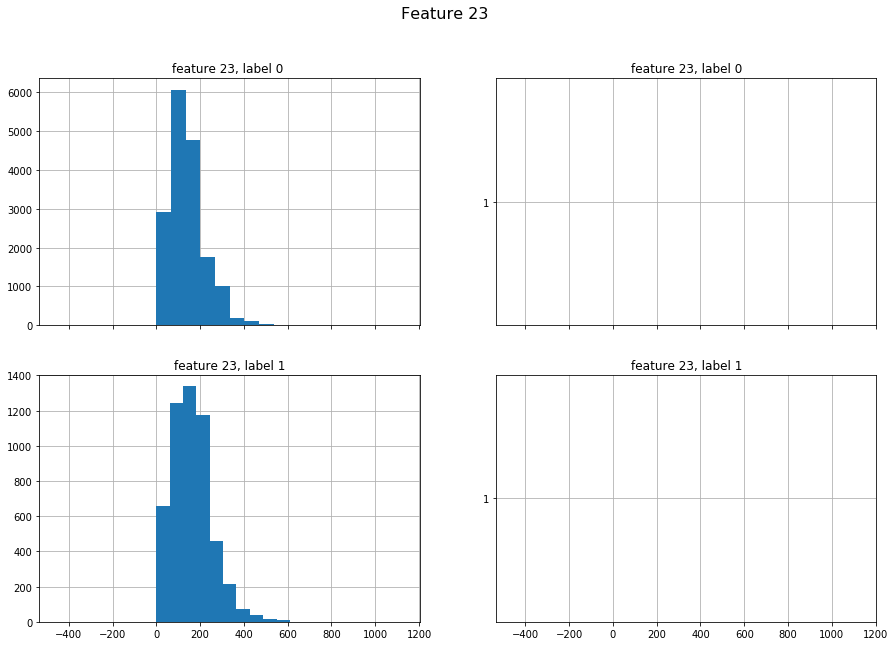

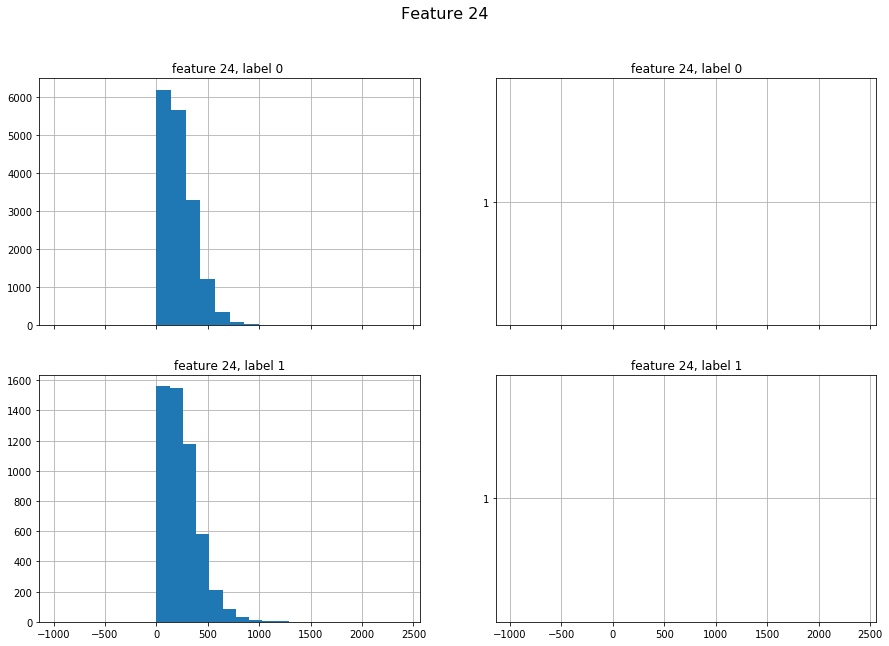

In [20]:
for feature in range(25):
    draw_graphs(df,feature)

<a id='preprocessing'></a>

# Part 2 - Preprocessing

## functions:

In [21]:
def category_into_num(df):
    # turn features 13 and 14 into numerical
    df = df[df['13'] !='unknown' ]
    df['13'] = df['13'].astype(int)
    df['14'] = df['14'].str.split("mm").map(lambda x: x[0])
    df = df[df['14'] !='nan' ]
    df['14'] = df['14'].astype(float)
    return df

In [22]:
def split(df):
    #split dataframe into X and y
    X = df.drop(['label'],axis = 1)
    y = df.loc[:,'label']
    return X,y

In [23]:
def Filling_the_missing_data(X, X_test):
    #fill the missing data with mean values
    X_test = X_test.fillna(X.mean())
    X =  X.fillna(X.mean())
    return X,X_test

In [24]:
def Outliers(df,df_label, z = 3):
    # remove outliers using z-score, ignoring nans
    indexes = np.abs(stats.zscore(df,nan_policy = 'omit'))
    indexes = np.nan_to_num(indexes)
    #remove both from data and labels
    df_label = df_label[(indexes < z).all(axis=1)]
    df = df[(indexes < z).all(axis=1)]
    return df,df_label

In [25]:
def combine_features(X,feature1,feature2):
    #function to sum features  
    new_feature = {feature1 + ' + ' + feature2 :X[feature1]+X[feature2]}
    df_1 = pd.DataFrame(new_feature)
    X = X.join(df_1).drop([feature1,feature2], axis=1)
    return X

In [26]:
def Normalization(df):
    # We initialize our scaler
    std = StandardScaler()
    # We fit our scaler
    std.fit(df)
    # We transform our X using the scaler we have just fit.
    scaled_X = std.transform(df)
    #scaled_X_test = std.transform(df_test)
    return scaled_X, std

In [27]:
def Clustering_plot(df):
    #for each value of k, we can initialise k_means and use inertia to identify the sum of squared distances of samples to the nearest cluster centre
    sum_of_squared_distances = []
    K = range(1,15)
    for k in K:
        k_means = KMeans(n_clusters=k)
        model = k_means.fit(df)
        sum_of_squared_distances.append(k_means.inertia_)
    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('sum_of_squared_distances')
    plt.title('elbow method for optimal k')
    plt.show()

In [28]:
def K_means(X):
    #Set number of clusters at initialisation time
    k_means = KMeans(n_clusters=3)
    #Run the clustering algorithm
    model = k_means.fit(X)
    #Generate cluster predictions and store in y_hat
    y_hat = k_means.predict(X)
    #Calculating the silhouette coefficient
    labels = k_means.labels_
    #Create a new column based on category cluster
    X['cluster']=labels
    return X,  model

In [29]:
def our_PCA(X, n_components):
    # 0 < n_components < 1 - 
    pca = PCA(n_components, svd_solver='full')
    pca.fit(X)
    X_new = pca.transform(X)
    return X_new, pca

In [30]:
def split_test(X,y):
    #split data into train and validation
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.25, random_state = 42, shuffle = True)
    return  X_train, X_validation, y_train, y_validation

## Implimentation

We have noticed that features 13 and 14 can be turned into numerical.

In [31]:
df = category_into_num(df)
df_test = category_into_num(df_test)

In [32]:
X,y = split(df)

After several trials it was decieded not to take into consideration categorical features (6,18,19,22) and features with more than 5% of missing values (5,15) as they don't conribute to the accuracy. <br>
Doing the same for the test set as we want it to have the same form as the train.

In [33]:
X = X.drop(['5','6','15','18','19','22'],axis = 1)
X_test = df_test.drop(['5','6','15','18','19','22'],axis = 1)


Combining correlative features together. These features were found by running different pipelines and checking the execution.

In [34]:
features_to_combine = [['2','0'],['8','17']]

In [35]:
for feature in features_to_combine:
    X = combine_features(X,feature[0],feature[1])
    X_test = combine_features(X_test,feature[0],feature[1])

Dropping some correlating features. These features were found by running different pipelines and checking the execution.

In [36]:
drop_features = ['1']

In [37]:
X = X.drop(drop_features,axis = 1)
X_test = X_test.drop(drop_features,axis = 1)

Dropping the values that lie farther than 3 standart deviations. This has shrinked the data size by 10%.

In [38]:
X,y = Outliers(X,y)

Filling the missing data with mean values both for train and test sets. Important to mention that for test set the mean values are those calculated on train set as it is bigger and more representative

In [39]:
X,X_test = Filling_the_missing_data(X,X_test)

Using K-Means clustering to divide data into groups.

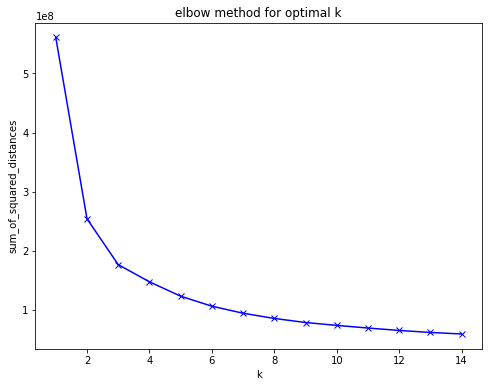

In [40]:
Clustering_plot(X)

Here we can see the drop in the sum of squared distance starts to slow down after k=3. Hence 3 is the optimal number of clusters for our analysis.

In [41]:
X,clf_k_means = K_means(X)

In [42]:
y_hat = clf_k_means.predict(X_test)
X_test['cluster']=y_hat

From exploration we can see that data is spread in different ranges, many algorythms (such as PCA) need normalized data. Using standartization (z-score normalization).

In [43]:
X,std = Normalization(X)
X_test = std.transform(X_test)

PCA

In [44]:
X_pca,pca= our_PCA(X, 0.85)
X_test_pca = pca.transform(X_test)

Spltting into train and validation in order to check the models on thedata set that was not used for training.

In [45]:
X_train, X_valid, y_train, y_valid = split_test(X,y)

In [46]:
X_train_pca, X_valid_pca, y_train_pca, y_valid_pca = split_test(X_pca,y)

<a id='models'></a>

# Part 3 -  Models

## KNN

In [47]:
def KNN(X,y):
    parametersOptions = {'n_neighbors' : [100,150,200,500],
        'weights' : ['uniform'], 
        'metric': ['euclidean']
    } 
                     
    GS = GridSearchCV(KNeighborsClassifier(), parametersOptions, cv=5, scoring='roc_auc')
    gs_results = GS.fit(X,y)
    return gs_results


## Logistic regression

In [48]:
def LogReg(X,y):
    parametersOptions = { 'penalty' : ["l1","l2"],
        'C' : [0.1,0.5,0.7,5,10], 
        'solver': ['liblinear'],
        'tol' : [0.0001], 
        'max_iter' : [300]
    } 
          
    GS = GridSearchCV(LogisticRegression(), parametersOptions, cv=5, scoring='roc_auc')

    gs_results = GS.fit(X,y)
    return gs_results


## Adaptive boosting

In [49]:
def AdaBoost(X,y):
    parametersOptions = { 'n_estimators': [50,100,300],
        'random_state':[0],
        'learning_rate':[.001,0.01,.1]
    } 
    GS = GridSearchCV(AdaBoostClassifier(), parametersOptions, cv=3, scoring='roc_auc')
    
    gs_results = GS.fit(X,y)
    return gs_results


## ANN

In [50]:
def ANN(X,y):
    parametersOptions = {'activation' : ["logistic", "relu"], #
                      'hidden_layer_sizes' : [(100,), # 1 large hidden layer
                                             (50, 50), # 2 medium size layers
                                             (20, 20, 10, 10, 10)], # multiple small sized layers
                      'batch_size' : [10, 50],
                      'learning_rate_init' : [0.1, 0.01], #In some of the runs we saw that the network got stuck on a local min, for this reason we enlearge the defualt momentum
                      'max_iter' : [1000]} 
    RS = RandomizedSearchCV(MLPClassifier(), parametersOptions, random_state=0,cv = 3 ,scoring='roc_auc')

    gs_results = RS.fit(X, y)
    return gs_results

<a id='evaluation'></a>

# Part 4 - Evaluation

## Functions

In [51]:
def Confusion_matrix(clf, X, y):
    plot_confusion_matrix(clf,X, y,cmap=plt.cm.Blues) 
    print('Accuracy: %.4f' % clf.score(X, y))

In [52]:
def KfoldPlot(X, y, clf, k = 5):
    #create canvas for ROC
    plt.figure(figsize=(7,7))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    #the name of classifier
    clfname = str(clf)[:str(clf).find("(")]
    plt.title('ROC for '+clfname)
    #make an np array of x at which we'll interpolate roc at each fold
    x = np.linspace(0,1,200)
    #approx -empty array- len of x
    approx = np.zeros(len(x))
    
    #with a KFold make a number of train-validation sets
    kf = KFold(n_splits=k, random_state=None, shuffle=True)
    kf.get_n_splits(X)
    #for each set:
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # fit X_train and y_train
        clf.fit(X_train, y_train)
        #prediction
        y_prob = clf.predict_proba(X_test)
        #set roc curve
        fpr, tpr, thresholds = roc_curve(y_test, y_prob[::,1])
        # plot ROC for this KFold 
        plt.plot(fpr, tpr, color='grey')
        #tpf_interp = np.interp(x = points x where to approximate, xp = fpr, fp = tpr)
        tpf_interp = np.interp(x, fpr, tpr)
        # approx+=tpf_interp
        approx+=tpf_interp
    plt.plot([0], [0], color='gray', label='K-folds') 
    #roc average
    roc_average=approx/k
    #plot random-guess line
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    #plot roc average
    plt.plot(x,roc_average, color='red', label='Mean ROC, (area= %.2f)' % auc(x,roc_average))
    # add to the legend  -  auc(x,roc_average)
    AUC = auc(x,roc_average)
    print ('AUC ',AUC)
    #show plot with a legend
    plt.legend()        
    plt.show()


In [53]:
def weighted_accuracy(y_true,y_pred):
    # function to calculate weighted accuracy
    
    # confusion matrix for y_true, and y_pred
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    # weights. misclassification of positive (w_fn) is 5 times worse than negative 
    w_tp, w_tn , w_fp, w_fn = 1,1,1,5
    # weighted accuracy formula
    w_accuracy = (w_tp * tp + w_tn * tn)/(w_tp * tp + w_tn * tn + w_fp * fp +w_fn * fn)
    return w_accuracy

In [54]:
def execution_differences(X_train, y_train, X_valid, y_valid, clf):
    # function to calculate the execution diferences in 
    y_predict = clf.predict_proba(X_valid)[::,1]
    fpr, tpr, thresholds = roc_curve(y_valid, y_predict)
    auc_validation = auc(fpr, tpr)
    
    y_predict = clf.predict_proba(X_train)[::,1]
    fpr, tpr, thresholds = roc_curve(y_train, y_predict)
    auc_train = auc(fpr, tpr)
    percentage =abs(auc_train - auc_validation)/auc_train *100
    return percentage, auc_validation

## KNN

In [55]:
res_KNN = KNN(X_train,y_train)

In [56]:
KNN_param = res_KNN.best_params_
clf_KNN = res_KNN.best_estimator_
KNN_param

{'metric': 'euclidean', 'n_neighbors': 100, 'weights': 'uniform'}

In [57]:
clf = KNeighborsClassifier(metric= 'euclidean', n_neighbors = 100, weights = 'uniform')


AUC  0.8402260077262983


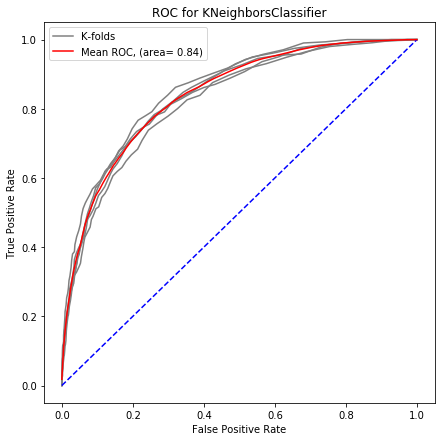

In [58]:
KfoldPlot(X_train, y_train,clf, k = 5)

In [59]:
y_pred = clf_KNN.predict(X_valid)

In [60]:
print("Weighted accuracy is : %f"  %weighted_accuracy(y_valid,y_pred))

Weighted accuracy is : 0.543420


In [61]:
print( "Execution differences : %f%%, AUC on validation : %f"%execution_differences(X_train, y_train, X_valid, y_valid, clf_KNN))

Execution differences : 1.410300%, AUC on validation : 0.843159


Accuracy: 0.8494


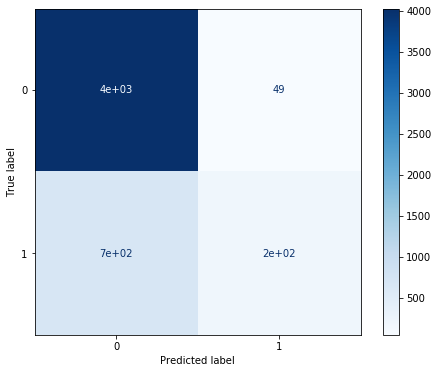

In [62]:
Confusion_matrix(clf_KNN, X_valid, y_valid)

## Logistic regression

In [63]:
res_LogReg = LogReg(X_train,y_train)
clf_LogReg = res_LogReg.best_estimator_

In [64]:
LogReg_param = res_LogReg.best_params_
LogReg_param

{'C': 0.5,
 'max_iter': 300,
 'penalty': 'l1',
 'solver': 'liblinear',
 'tol': 0.0001}

In [65]:
clf = LogisticRegression(C = 0.5, max_iter = 300,penalty = 'l1',solver = 'liblinear',tol = 0.0001)

AUC  0.862506201019946


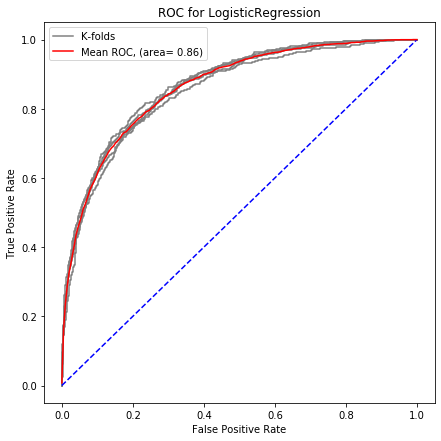

In [66]:
KfoldPlot(X_train, y_train, clf, k = 5)

In [67]:
y_pred = clf_LogReg.predict(X_valid)

In [68]:
print("Weighted accuracy is : %f"  %weighted_accuracy(y_valid,y_pred))

Weighted accuracy is : 0.610425


In [69]:
print( "Execution differences : %f%%, AUC on validation : %f"%execution_differences(X_train, y_train, X_valid, y_valid, clf_LogReg))

Execution differences : 0.096446%, AUC on validation : 0.862633


Accuracy: 0.8643


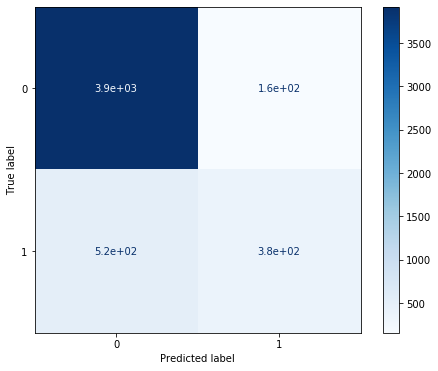

In [70]:
Confusion_matrix(clf_LogReg, X_valid, y_valid)

## AdaBoost

In [71]:
res_AdaBoost = AdaBoost(X_train,y_train)
clf_AdaBoost = res_AdaBoost.best_estimator_

In [72]:
AdaBoost_param = res_AdaBoost.best_params_
AdaBoost_param

{'learning_rate': 0.1, 'n_estimators': 300, 'random_state': 0}

In [73]:
clf = AdaBoostClassifier(learning_rate = 0.1, n_estimators =  300, random_state = 0)

AUC  0.8561163210081645


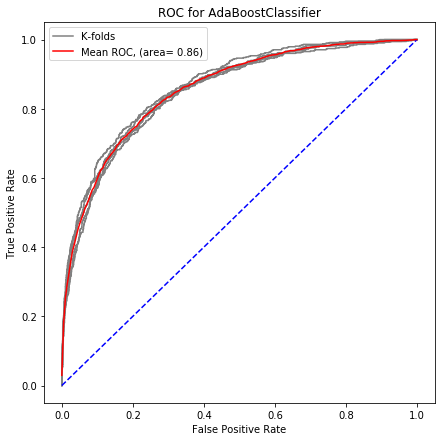

In [74]:
KfoldPlot(X_train, y_train, clf, k = 5)

In [75]:
y_pred = clf_AdaBoost.predict(X_valid)

In [76]:
print("Weighted accuracy is : %f"  %weighted_accuracy(y_valid,y_pred))

Weighted accuracy is : 0.604808


In [77]:
print( "Execution differences : %f%%, AUC on validation : %f"%execution_differences(X_train, y_train, X_valid, y_valid, clf_AdaBoost))

Execution differences : 0.410997%, AUC on validation : 0.863854


Accuracy: 0.8651


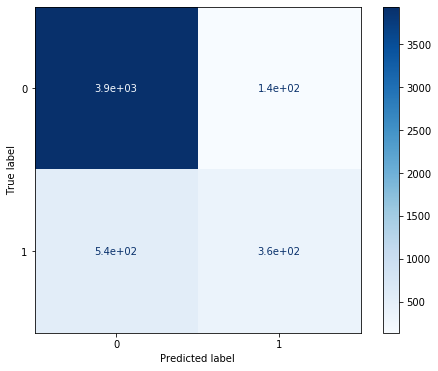

In [78]:
Confusion_matrix(clf_AdaBoost, X_valid, y_valid)

## ANN

In [79]:
res_ANN = ANN(X_train,y_train)
clf_ANN = res_ANN.best_estimator_

In [80]:
ANN_param = res_ANN.best_params_
ANN_param

{'max_iter': 1000,
 'learning_rate_init': 0.01,
 'hidden_layer_sizes': (100,),
 'batch_size': 10,
 'activation': 'relu'}

In [81]:
clf = MLPClassifier(max_iter = 1000, learning_rate_init =  0.01, hidden_layer_sizes = (100,),batch_size = 10, activation = 'relu')

AUC  0.8605644669223453


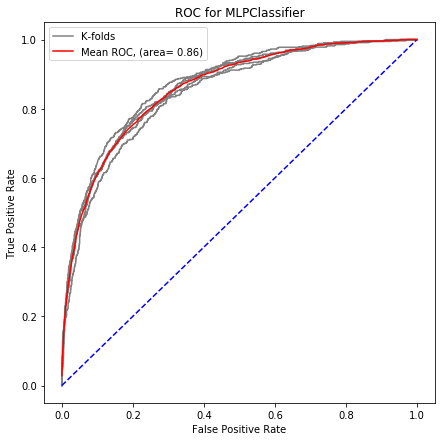

In [82]:
KfoldPlot(X_train, y_train, clf, k = 5)

In [83]:
y_pred = clf_ANN.predict(X_valid)

In [84]:
print("Weighted accuracy is :%f"  %weighted_accuracy(y_valid,y_pred))

Weighted accuracy is :0.634669


In [85]:
print( "Execution differences : %f%%, AUC on validation : %f"%execution_differences(X_train, y_train, X_valid, y_valid, clf_ANN))

Execution differences : 2.111376%, AUC on validation : 0.866521


Accuracy: 0.8629


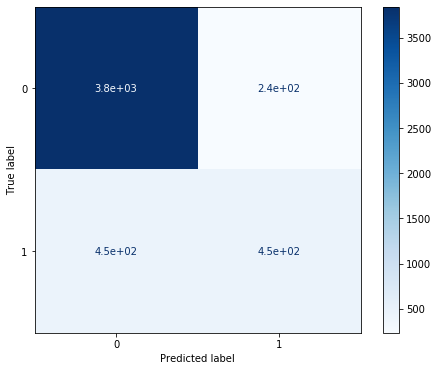

In [86]:
Confusion_matrix(clf_ANN, X_valid, y_valid)

<a id='prediction'></a>
# Part 5 - Prediction

In [87]:
pred_proba = clf_ANN.predict_proba(X_test)

In [88]:
pred = pd.DataFrame(pred_proba[::,1], columns=['pred_proba'] )

In [89]:
pred.to_csv('Submission_group_3.csv')

In [90]:
stop = timeit.default_timer()
print('Running Time: ', (stop - start)/60, ' minutes') 

Running Time:  29.041827758333334  minutes
